In [59]:
제외한 데이터
손발이 짤린 영상
정답과 반대로 보고있는 영상
fps 안맞는거 (변환 귀찮아서)


다른 춤에 대해서 똑같은 기준으로 점수매기기 힘들지 않을까?
-> 결국 같은 춤 안에서 순위가 더 중요할지도



SyntaxError: invalid syntax (1747661815.py, line 1)

In [ ]:
part_name = {
    0: 'root (pelvis)',
    1: 'right_hip',
    2: 'right_knee',
    3: 'right_foot',
    4: 'left_hip',
    5: 'left_knee',
    6: 'left_foot',
    7: 'spine',
    8: 'thorax',
    9: 'neck_base',
    10: 'head',
    11: 'left_shoulder',
    12: 'left_elbow',
    13: 'left_wrist',
    14: 'right_shoulder',
    15: 'right_elbow',
    16: 'right_wrist'
}

In [ ]:
import pandas as pd
score = pd.read_csv("score.tsv", delimiter="\t")

In [ ]:
teacher_offset = {
    "Bambi": 7,
    "Alcohol-Free (Pt.2)": 12,
    "X1-MA": 3,
    "You can't sit with us (Original)": 4,
    "Wow Thing": 0,
    "BEcause (Original)": 0,
}

In [64]:
from pathlib import Path
import json
import numpy as np

basedir = Path("/mnt/c/Users/USER/Dropbox/머신러닝_수강생영상 (2)/")
d = {}
for i, r in score.iterrows():
    title = r['title'].strip()
    filename = r['file name']
    score1 = r['Skill']
    score2 = r['Expression']

    if title not in ["Bambi", "X1-MA", "Taemin", "Wow Thing"]:
        continue
    
    t = basedir / title / Path(filename + '.json')
    if t.is_file():
        with open(t, "r") as f:
            tt = json.load(f)
            
        x_angle = np.array(tt["angle"])
        y_angle = None
        for f in os.listdir(basedir / title / "강사님 영상"):
            if f.endswith("json"):
                with open(basedir / title / "강사님 영상" / f, "r") as f:
                    tt = json.load(f)
                y_angle = np.array(tt["angle"])
                y_angle = y_angle[teacher_offset[title] * 30:, :]
        if y_angle is not None:
            d[filename] = (score1, score2, x_angle, y_angle)

In [65]:
d.keys()

dict_keys(['0007_BAEKHYUN_Bambi', '0008_BAEKHYUN_Bambi', '0009_BAEKHYUN_Bambi', '1971_STATION X 0_Wow Thing', '1972_STATION X 0_Wow Thing', '1973_STATION X 0_Wow Thing', '1974_STATION X 0_Wow Thing', '1975_STATION X 0_Wow Thing', '1976_STATION X 0_Wow Thing', '1978_STATION X 0_Wow Thing', '1979_STATION X 0_Wow Thing', '1980_STATION X 0_Wow Thing', '1981_STATION X 0_Wow Thing', '1984_STATION X 0_Wow Thing', '1985_STATION X 0_Wow Thing', '1986_STATION X 0_Wow Thing', '1987_STATION X 0_Wow Thing', '1989_STATION X 0_Wow Thing', '1990_STATION X 0_Wow Thing', '1991_STATION X 0_Wow Thing', '1992_STATION X 0_Wow Thing', '1993_STATION X 0_Wow Thing', '1994_STATION X 0_Wow Thing', '1995_STATION X 0_Wow Thing', '1996_STATION X 0_Wow Thing', '1997_STATION X 0_Wow Thing', '1998_STATION X 0_Wow Thing', '1999_STATION X 0_Wow Thing', '2000_STATION X 0_Wow Thing', '2001_STATION X 0_Wow Thing', '2002_STATION X 0_Wow Thing', '2005_STATION X 0_Wow Thing', '2007_STATION X 0_Wow Thing', '2008_STATION X 0_Wo

In [66]:

names = [
    ['root (pelvis)', 'right_hip', 'left_hip'],
    ['root (pelvis)', 'right_hip', 'spine'],
    ['root (pelvis)', 'left_hip', 'spine'],
    ['right_hip', 'root (pelvis)', 'right_knee'],
    ['right_knee', 'right_hip', 'right_foot'],
    ['left_hip', 'root (pelvis)', 'left_knee'],
    ['left_knee', 'left_hip', 'left_foot'],
    ['spine', 'root (pelvis)', 'thorax'],
    ['thorax', 'spine', 'neck_base'],
    ['thorax', 'spine', 'left_shoulder'],
    ['thorax', 'spine', 'right_shoulder'] ,
    ['thorax', 'neck_base', 'left_shoulder'] ,
    ['thorax', 'neck_base', 'right_shoulder'] ,
    ['thorax', 'left_shoulder', 'right_shoulder'] ,
    ['neck_base', 'thorax', 'head'] ,
    ['left_shoulder', 'thorax', 'left_elbow'] ,
    ['left_elbow', 'left_shoulder', 'left_wrist'] ,
    ['right_shoulder', 'thorax', 'right_elbow'] ,
    ['right_elbow', 'right_shoulder', 'right_wrist'] ,
]

In [75]:
import cv2, mmcv
import tqdm

def frame_connect(f1, f2):
    BG = np.zeros([800, 800, 3], dtype= np.uint8)
    BG[0:400, 0:800, :] = f1
    BG[400:800, 0:800, :] = f2
    return BG

def make_compare_vid(path1, path2, ad1, ad2, start_point1, start_point2, target_file):
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = None
    video1 = mmcv.VideoReader(path1)
    video2 = mmcv.VideoReader(path2)

    l1 = (len(video1) - start_point1) - 4*30
    l2 = (len(video2) - start_point2)
    print(l1, l2)
    
    l = min(l1, l2)
    for i in tqdm.tqdm(range(l)):
        f1 = video1[start_point1 + i]
        f2 = video2[start_point2 + i]
        fc = frame_connect(f1, f2)
        
        v1 = ad1[start_point1 + i]
        v2 = ad2[i]
        res = [0] * 20
        for k in range(19):
            res[k] = np.abs(v1[k, 0] - v2[k, 0]) * np.min([v1[k, 1], v2[k, 1]], axis=0)
        res[-1] = 1
        
        tt = res * coef

        cv2.putText(fc, 
                    f"{np.sum(tt):.4f}", 
                    (700, 15), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3,
                    (0, 0, (10-np.sum(tt))*25), 
                    2, 
                    cv2.LINE_4)
        
        for i in range(19):
            cv2.putText(fc, 
                        f"{i} - {res[i]:.4f}", 
                        (700, 15*i+30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3,
                        (0, 0, (res[i])*250), 
                        2, 
                        cv2.LINE_4)
        if writer is None:
            writer = cv2.VideoWriter(
                target_file, fourcc,
                30, (800, 800))
        writer.write(fc)
    writer.release()


basedir = Path("/mnt/c/Users/USER/Dropbox/머신러닝_수강생영상 (2)/")
title = 'X1-MA'

v1 = "/home/syd/workspace/mmpose/vis_results/vis_1986_STATION X 0_Wow Thing.mov"
v2 = "/home/syd/workspace/mmpose/vis_results/vis_Instructor_STATION X 0_Wow Thing1.mp4"

for filename, val in d.items():
    s1, s2, x_angle, y_angle = val
    if filename == "1986_STATION X 0_Wow Thing":
        make_compare_vid(str(v1), str(v2), x_angle, y_angle, 33 , 0, "vis_1986.mp4")


1361 1560


  0%|          | 0/1361 [00:00<?, ?it/s]


ValueError: could not broadcast input array from shape (400,400,3) into shape (400,800,3)

/tmp/ipykernel_6435/3670507541.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tt = np.sum(np.array(list(d.values()) + [1]) * coef, axis=0)


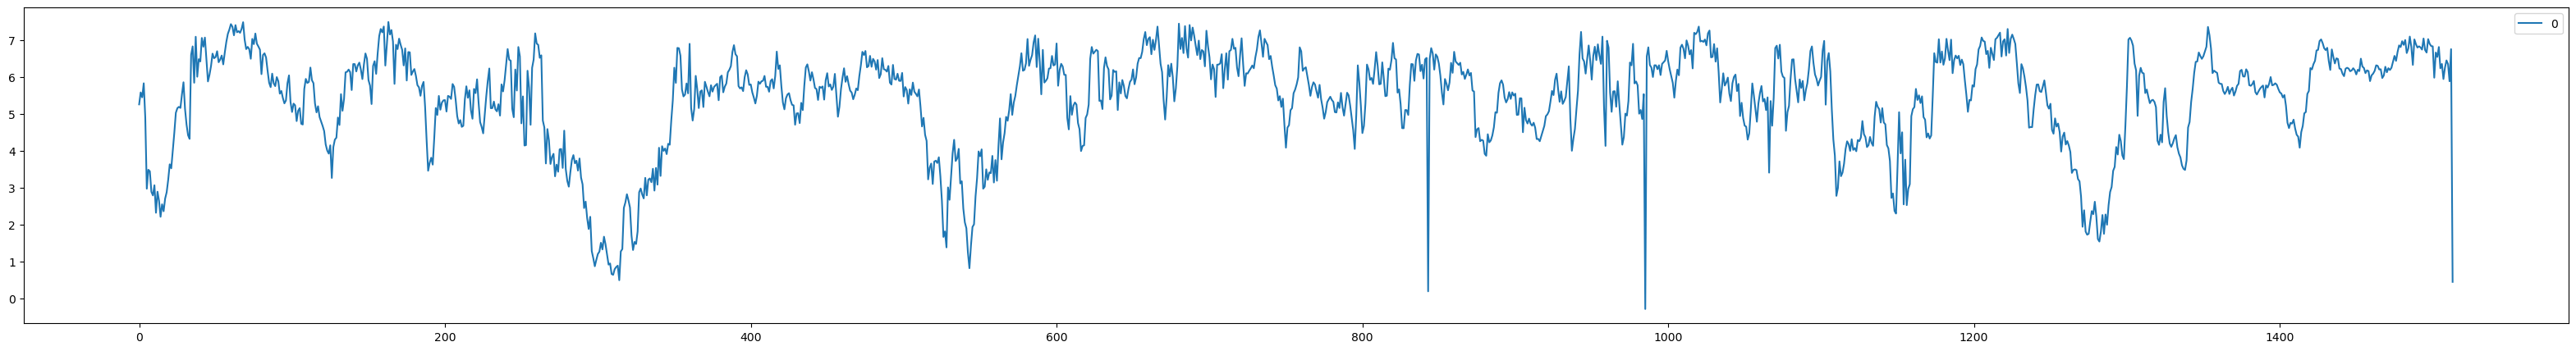

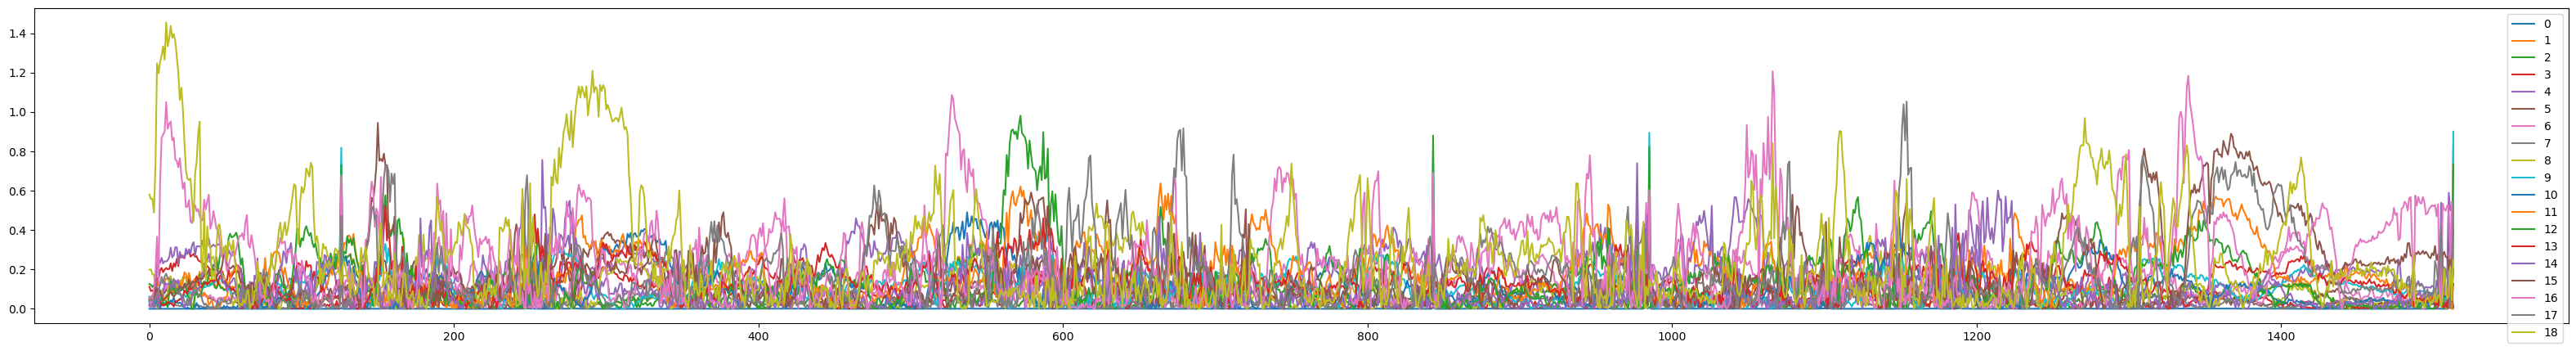

In [74]:
def asdf2(ad1, ad2, kp, start_point, plot=False):
    l1 = ad1.shape[0]
    l2 = ad2.shape[0]
    if l1 > l2:
        t = ad1; ad1 = ad2; ad2 = t
        l1 = ad1.shape[0]
        l2 = ad2.shape[0]
    rr = []
    v1 = ad1
    v2 = ad2[start_point:start_point + len(ad1)]

    v1 = v1[:len(v2)]    

    res = 0
    d = {}
    pd.DataFrame({
        "v1": v1[:, kp, 0],
        "v2": v2[:, kp, 0],
        "vd": v1[:, kp, 0]-v2[:, kp, 0],
    }).plot(title="vv", figsize=(40, 5))
    pd.DataFrame(v1[:, kp, 1]).plot(title="v1_1", figsize=(40, 5))
    pd.DataFrame(v2[:, kp, 1]).plot(title="v2_1", figsize=(40, 5))
    
coef = np.array([-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -1.9467949036196772, -10.0, -0.0001, -0.0001, -8.303305212334733, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -3.2175134352019756, 7.710570771139791])

def asdf(ad1, ad2, start_point, plot=False):
    l1 = ad1.shape[0]
    l2 = ad2.shape[0]
    if l1 > l2:
        t = ad1; ad1 = ad2; ad2 = t
        l1 = ad1.shape[0]
        l2 = ad2.shape[0]
    rr = []
    v1 = ad1
    v2 = ad2[start_point:start_point + len(ad1)]

    v1 = v1[:len(v2)]    

    res = [0] * 19
    d = {}
    for k in range(19):
        t = np.abs(v1[:, k, 0] - v2[:, k, 0]) * np.min([v1[:, k, 1], v2[:, k, 1]], axis=0)
        if plot:
            # pd.DataFrame(t).plot(title=str(names[k]), figsize=(40, 5))
            pass
        d[k] = np.array(t)
        res[k] = np.mean(t)
    if plot:
        tt = np.sum(np.array(list(d.values()) + [1]) * coef, axis=0)
        pd.DataFrame(tt).plot(figsize=(40, 5))
        pd.DataFrame(d).plot(figsize=(40, 5))
    return res


def get_best(ad1, ad2, verbose=False):
    rr_d = {}
    for start_point in range(300):
        rr_d[start_point] = asdf(ad1, ad2, start_point)
        if verbose:
            print(start_point, rr_d[start_point])
    pos = min(rr_d.keys(), key=lambda x: np.mean(rr_d[x]))
    return pos, rr_d[pos]

d2 = {}
for filename, val in d.items():
    s1, s2, x_angle, y_angle = val
    if filename == "1986_STATION X 0_Wow Thing":
        asdf(x_angle, y_angle, 33, plot=True)
    # print(filename, get_best(x_angle, y_angle, verbose=False))

In [73]:
import numpy as np
from scipy.optimize import minimize


score_cnt = {}
for filename, val in d.items():
    s1, s2, x_angle, y_angle = val
    score_cnt[s1] = score_cnt.get(s1, 0) + 1

max_cnt = max(score_cnt.values())

a = []
b = []

d2 = {}
for filename, val in d.items():
    s1, s2, x_angle, y_angle = val
    pos, rr = get_best(x_angle, y_angle)
    
    t = rr + [1]
    repeat = max_cnt // score_cnt[s1]
    print(filename, pos, repeat, rr)
    for _ in range(repeat):
        a.append(t)
        b.append(s1)

a = np.array(a,  order='C')
print(a.shape)
n = len(b)

# Ax = b --> x = [1., -2., 3.]

fun = lambda x: np.linalg.norm(np.dot(a,x)-b)
print(fun([1]*20))
# xo = np.linalg.solve(A,b)
# sol = minimize(fun, xo, method='SLSQP', constraints={'type': 'ineq', 'fun': lambda x:  x})
sol = minimize(fun, np.zeros(20), method='L-BFGS-B', bounds=[(-100, -0.0001) for x in range(19)]+[(None,None)])

res = sol['x'] # [2.79149722e-01, 1.02818379e-15, 1.88222298e+00]

print(res)
print(list(res))

def show(best_rr, res0):
    score = res0[-1] + np.sum(best_rr * res0[:-1])
    return score

for fname, val in d.items():
    s1, s2, x_angle, y_angle = val
    pos, rr = get_best(x_angle, y_angle, verbose=False)
    print(show(rr, res), fname, s1, s2)

0007_BAEKHYUN_Bambi 96 6 [0.00046800556829930986, 0.06874273716230654, 0.06766492358360869, 0.0699548238648341, 0.14194656284741686, 0.06601426154435917, 0.09729374750416532, 0.06514004157722446, 0.12820690446969893, 0.07101356985739485, 0.06478216220180552, 0.22695781775299753, 0.18714965995828284, 0.0824783734089996, 0.13383463833381026, 0.16300655131190642, 0.23313172565978815, 0.1430964807905082, 0.2433632550164251]
0008_BAEKHYUN_Bambi 81 6 [0.0004510884591902832, 0.044920665902872615, 0.0446226089188581, 0.07095345001113042, 0.1675404901881758, 0.059597250712336715, 0.15750613099122865, 0.023002506136437298, 0.1295219774430713, 0.07772369002072617, 0.07417557301911387, 0.14941655834951323, 0.15163194267887845, 0.12479537347721839, 0.10863007158472075, 0.16260160578868593, 0.20164618968629816, 0.14143696471782813, 0.22358817373908804]
0009_BAEKHYUN_Bambi 11 2 [0.0006732924649073103, 0.06052278724913432, 0.05944918223228277, 0.09705385542905214, 0.16381825191352617, 0.12303362228338

In [ ]:
for name, x in zip(names,res):
    print(name, x)

['root (pelvis)', 'right_hip', 'left_hip'] -0.1
['root (pelvis)', 'right_hip', 'spine'] -0.1
['root (pelvis)', 'left_hip', 'spine'] -0.1
['right_hip', 'root (pelvis)', 'right_knee'] -0.1
['right_knee', 'right_hip', 'right_foot'] -0.1
['left_hip', 'root (pelvis)', 'left_knee'] -0.1
['left_knee', 'left_hip', 'left_foot'] -3.579702257754106
['spine', 'root (pelvis)', 'thorax'] -5.0
['thorax', 'spine', 'neck_base'] -0.1
['thorax', 'spine', 'left_shoulder'] -0.1
['thorax', 'spine', 'right_shoulder'] -0.1
['thorax', 'neck_base', 'left_shoulder'] -0.1
['thorax', 'neck_base', 'right_shoulder'] -0.1
['thorax', 'left_shoulder', 'right_shoulder'] -0.1
['neck_base', 'thorax', 'head'] -0.1
['left_shoulder', 'thorax', 'left_elbow'] -0.1
['left_elbow', 'left_shoulder', 'left_wrist'] -5.0
['right_shoulder', 'thorax', 'right_elbow'] -0.1
['right_elbow', 'right_shoulder', 'right_wrist'] -5.0


In [ ]:
import os
basedir = "/mnt/c/Users/USER/Dropbox/머신러닝_수강생영상 (2)/X1-MA/"

for f in os.listdir(basedir + "/강사님 영상/"):
    if f.endswith("json"):
        y_kp = load_angle(basedir + "/강사님 영상/" + f)
        print(f)
        break

d = {}
for f in os.listdir(basedir):
    if f.endswith("json"):
        print(f)
        d[f] = load_angle(basedir + f)

Instructor_Produce X 101_X1-MA1.json
2056_Produce X 101_X1-MA.json
2060_Produce X 101_X1-MA.json


In [ ]:
def get_best(ad1, ad2):
    l1 = len(ad1[(0, 1, 4)])
    l2 = len(ad2[(0, 1, 4)])
    if l1 > l2:
        t = ad1; ad1 = ad2; ad2 = t
        l1 = len(ad1[(0, 1, 4)])
        l2 = len(ad2[(0, 1, 4)])

    rr_d = {}
    for start_point in range(l2 - l1):
        rr = []
        for k in ad1.keys():
            v1 = ad1[k]
            v2 = ad2[k][start_point:start_point+l1]
            r = np.average([np.abs(d1-d2) for d1, d2 in zip(v1, v2)])
            rr.append(r)
        rr_d[start_point] = rr

    pos = min(rr_d.keys(), key=lambda x: sum(rr_d[x]))
    return pos, sum(rr_d[pos])

In [ ]:
for k, v in d.items():
    print(k, get_best(v, y_kp))

2056_Produce X 101_X1-MA.json (0, 3.979035546744353)
2060_Produce X 101_X1-MA.json (0, 3.4819846077488847)


In [ ]:
2055_Produce X 101_X1-MA	5.25	4	5	
2056_Produce X 101_X1-MA	6.875	7.5	7	
2057_Produce X 101_X1-MA	6.75	7	7	
2058_Produce X 101_X1-MA	5	    5	5	
2059_Produce X 101_X1-MA	5.25	5	6	
2060_Produce X 101_X1-MA	5	    5	5	
2061_Produce X 101_X1-MA	6.875	7	7.5	
2062_Produce X 101_X1-MA	5.75	6	6	
2063_Produce X 101_X1-MA	4.75	4	5	
2064_Produce X 101_X1-MA	4.25	4	4	
2065_Produce X 101_X1-MA	6.25	7	6	
2066_Produce X 101_X1-MA	5.25	5	5	
2067_Produce X 101_X1-MA	5.75	6	5	
2068_Produce X 101_X1-MA	5	    5	5	


In [ ]:

def show(best_rr):
    print(sum(best_rr))
    rl = []
    for pt, v in zip(ad1.keys(), best_rr):
        k = [part_name[p] for p in pt]
        rl.append((v, k, pt))
    return sorted(rl)

show(rr_d[97])

4.4790336503887564


[(0.001110787255925706, ['root (pelvis)', 'right_hip', 'left_hip'], (0, 1, 4)),
 (0.0972675688775057, ['spine', 'root (pelvis)', 'thorax'], (7, 0, 8)),
 (0.13517837604320365, ['left_hip', 'root (pelvis)', 'left_knee'], (4, 0, 5)),
 (0.1405914930742596, ['right_hip', 'root (pelvis)', 'right_knee'], (1, 0, 2)),
 (0.15559162153286604, ['thorax', 'spine', 'right_shoulder'], (8, 7, 14)),
 (0.15870784028107643, ['thorax', 'spine', 'left_shoulder'], (8, 7, 11)),
 (0.16549940222688797, ['root (pelvis)', 'left_hip', 'spine'], (0, 4, 7)),
 (0.1656242087167294, ['root (pelvis)', 'right_hip', 'spine'], (0, 1, 7)),
 (0.18521911474449376, ['left_knee', 'left_hip', 'left_foot'], (5, 4, 6)),
 (0.19659741988180918, ['thorax', 'spine', 'neck_base'], (8, 7, 9)),
 (0.21762764602755752,
  ['thorax', 'left_shoulder', 'right_shoulder'],
  (8, 11, 14)),
 (0.24914220877192716, ['neck_base', 'thorax', 'head'], (9, 8, 10)),
 (0.2560428816002489, ['right_knee', 'right_hip', 'right_foot'], (2, 1, 3)),
 (0.27523306

In [ ]:

show(rr_d[90])

4.834227893580168


[(0.0012682656846213817,
  ['root (pelvis)', 'right_hip', 'left_hip'],
  (0, 1, 4)),
 (0.09863329288896566, ['spine', 'root (pelvis)', 'thorax'], (7, 0, 8)),
 (0.158807814910912, ['left_hip', 'root (pelvis)', 'left_knee'], (4, 0, 5)),
 (0.16244524405197006,
  ['right_hip', 'root (pelvis)', 'right_knee'],
  (1, 0, 2)),
 (0.16695589860829418, ['thorax', 'spine', 'right_shoulder'], (8, 7, 14)),
 (0.17678463075522652, ['root (pelvis)', 'left_hip', 'spine'], (0, 4, 7)),
 (0.1769686214201406, ['root (pelvis)', 'right_hip', 'spine'], (0, 1, 7)),
 (0.1802014672174334, ['thorax', 'spine', 'left_shoulder'], (8, 7, 11)),
 (0.20376439448596353, ['thorax', 'spine', 'neck_base'], (8, 7, 9)),
 (0.20478703976531729, ['left_knee', 'left_hip', 'left_foot'], (5, 4, 6)),
 (0.2411863809083024,
  ['thorax', 'left_shoulder', 'right_shoulder'],
  (8, 11, 14)),
 (0.24582993967743377, ['neck_base', 'thorax', 'head'], (9, 8, 10)),
 (0.2553070542152698, ['right_knee', 'right_hip', 'right_foot'], (2, 1, 3)),
 (0.2